In [3]:
library('igraph')
library('Matrix')
library('pracma')

In [8]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

### Homework Q2


In [7]:
random_walk_distance = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    shortest_paths = distances(g)
    
    v = start_node
    
    dist_vec = integer(num_steps)

    for(i in 1:num_steps){
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
        
        #get shortest distance
        dist = shortest_paths[start_node,v]
        dist_vec[i] = dist
    }
#     ret_list = list(dist_vec, v)
#     return(ret_list)
    return(dist_vec)
}

In [29]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
#         fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

#### Part 1

[1] "degree:"
   [1] 10  9 13 10  9  6 16 14  8  7 10 14 14  7 12  7  3  9  9  9  9 12 14 10
  [25] 10  7  6  8  8  9  8  7 12 10 10 11 11 10  9  7 10  9  7 11 10 16 10  8
  [49]  7 15 11  8  7  8 13  9 10  5  7 12  7 11  9 11 12 20  5  6  7 14 11 13
  [73] 11 12 12  9 11  9  8 12  4 13  8 10  8 11  8  8 10 10 11 13  6  8 10  4
  [97]  7  5  6  6 10  7 11 11 13 16 11 13  9  8  7 14 12 10 12  9 18 10  8 15
 [121] 11 10  5 10 10  9 12  5 11 16 12 11 20  8 11  7  9  8  8 13  5 13  6  7
 [145]  7 13  9  8  9  6  4 10 12  6  3  6  8  7 15  9 10 15 15  9 10 12 13  5
 [169] 12  8 10 13 11 10 12 10 11 11 12  9  7 10  9  6  6 10 10 11  3  5 10  9
 [193]  8  7  6  3  6 16  7 10 12 14 13  9 10  8  6 14 11  7 13  8  7  7  9  9
 [217]  5  7  7  7 12 12  9 14 16 11  8  8  7 11 11 11  7 10 11  7 17 19 11 13
 [241]  6 14 11 10 11  9  9  8 11 15  7 13  7  5  6 10 10 10 17 13 13 12  6  3
 [265] 12  8 10 19 10 16  8  8  8 12  9  8  8 11  6  8 10 12  6 14 16 11  8 11
 [289]  3  7 10 11 13  5  9 12  8  8  

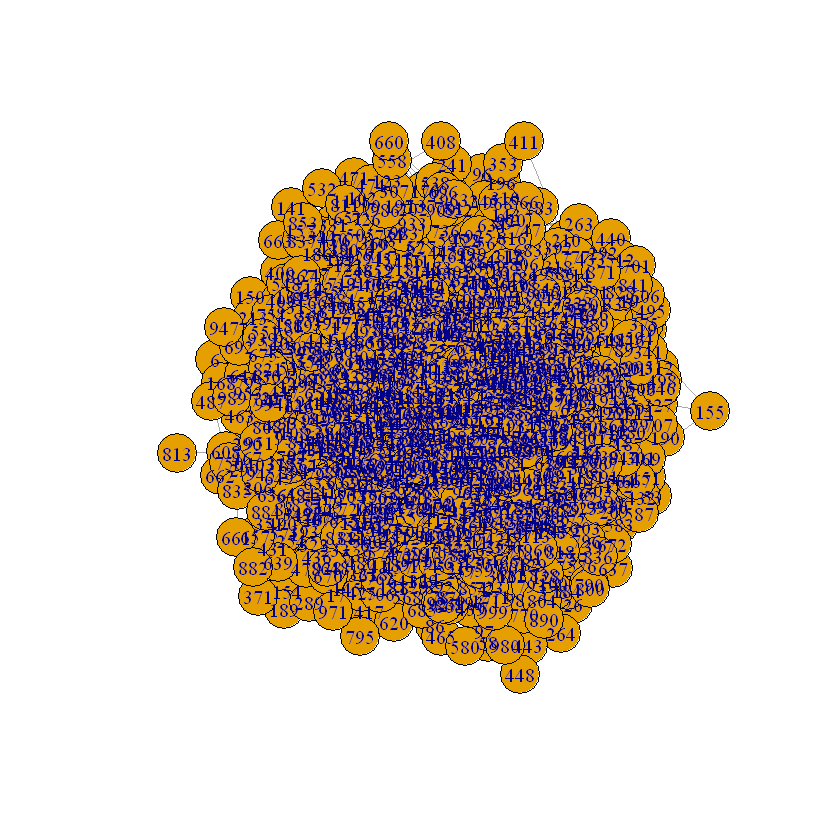

In [41]:
# set.seed(0)
graph_size = 1000
p = 0.01
g = sample_gnp(graph_size, p)
print('degree:')
print(degree(g))
print('degree distribution:')
print(degree_distribution(g))
print('diameter:')
print(diameter(g))
print('is connected:')
print(is_connected(g))
plot(g)

 [1] 1.00 1.82 2.53 2.91 3.09 3.16 3.29 3.19 3.26 3.29 3.31 3.22 3.29 3.30 3.38
[16] 3.28 3.21 3.30 3.32 3.34
 [1] 0.0000 0.3276 0.6491 0.9019 0.6819 0.6744 0.5059 0.5539 0.4524 0.3859
[11] 0.4339 0.3916 0.4459 0.3500 0.3356 0.3616 0.4659 0.4700 0.4176 0.4844


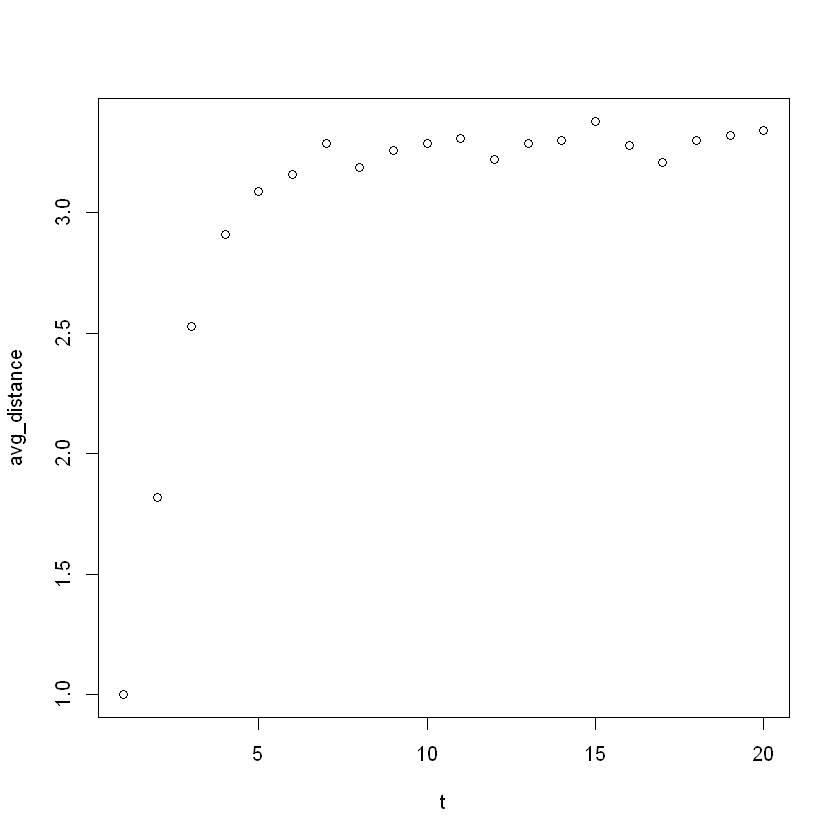

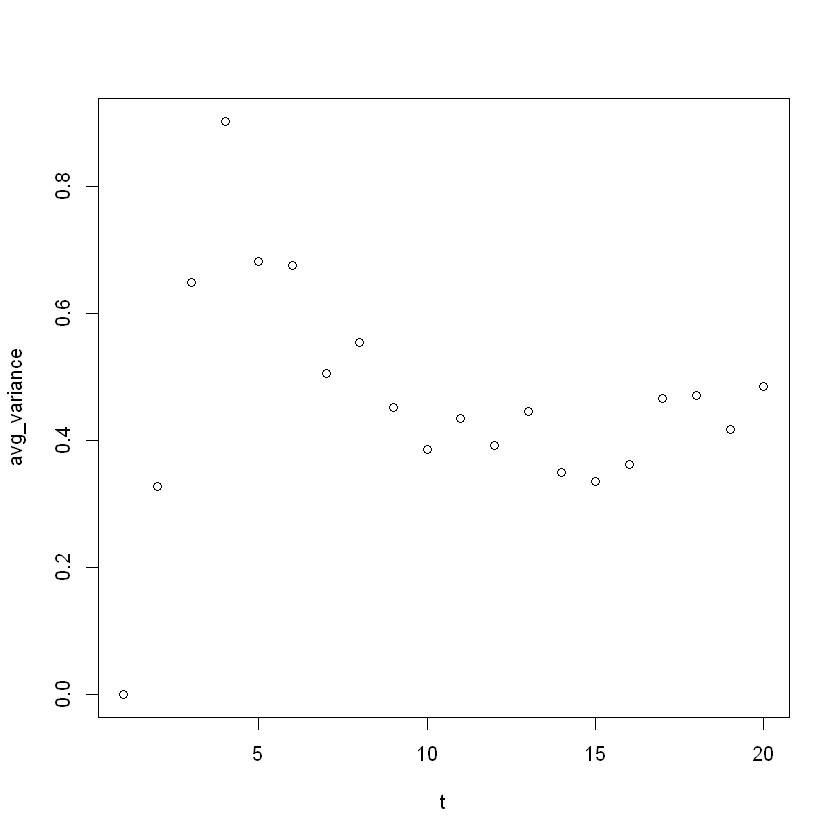

In [42]:
num_steps = 20
t = 1:num_steps

avg_dist_count_vec = integer(num_steps)
avg_var_count_vec = double(num_steps)

iter = 100

dist_vec_lst <- vector("list", iter)
last_v_lst = integer(iter)

for(i in 1:iter){
    rnd_start_node = sample(1:graph_size,1)
    dist_vec_lst[[i]] <- random_walk_distance(g, num_steps, rnd_start_node)
#     dist_vec_lst[[i]] = ret_lst[1]
#     last_v_lst[i] = ret_lst[2]
    avg_dist_count_vec = avg_dist_count_vec + dist_vec_lst[[i]]
}

#calculate average distance
avg_distance = avg_dist_count_vec / iter
print(avg_distance)
plot(t,avg_distance)

for(i in 1:iter){
    avg_var_count_vec = avg_var_count_vec + (dist_vec_lst[[i]] - avg_distance)^2
}

#calculate average variance
avg_variance = avg_var_count_vec / iter
print(avg_variance)
plot(t,avg_variance)

In [43]:
#get degree distribution at end of random walk
num_steps = 20
t = 1:num_steps

iter = 100

final_v_vec = integer(iter)

for(i in 1:iter){
    rnd_start_node = sample(1:graph_size,1)
    final_v_vec[i] = random_walk(g, num_steps, rnd_start_node)
}

# print(final_v_vec)
print("degree distribution of final nodes in walk:")
print(degree_distribution(g,v=final_v_vec))

[1] "degree distribution of final nodes in walk:"
 [1] 0.00 0.00 0.00 0.00 0.01 0.03 0.09 0.09 0.11 0.11 0.17 0.12 0.05 0.07 0.07
[16] 0.01 0.03 0.01 0.01 0.01 0.01


#### Part 2


[1] "degree:"
  [1]  2 22  5  3  2  5  1  3  5  2  7  3  1  5  4  2  2  2  2  7  1  3  3  1  2
 [26]  3  2  1  1  1  1  1  4  2  2  2  2  1  2  1  3  2  1  1  2  1  3  1  1  1
 [51]  3  1  2  1  1  1  1  4  1  1  3  2  1  1  1  1  1  1  1  1  1  1  1  1  1
 [76]  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1
[1] "degree distribution:"
 [1] 0.00 0.60 0.20 0.10 0.03 0.04 0.00 0.02 0.00 0.00 0.00 0.00 0.00 0.00 0.00
[16] 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01
[1] "diameter:"
[1] 12
[1] "is connected:"
[1] TRUE


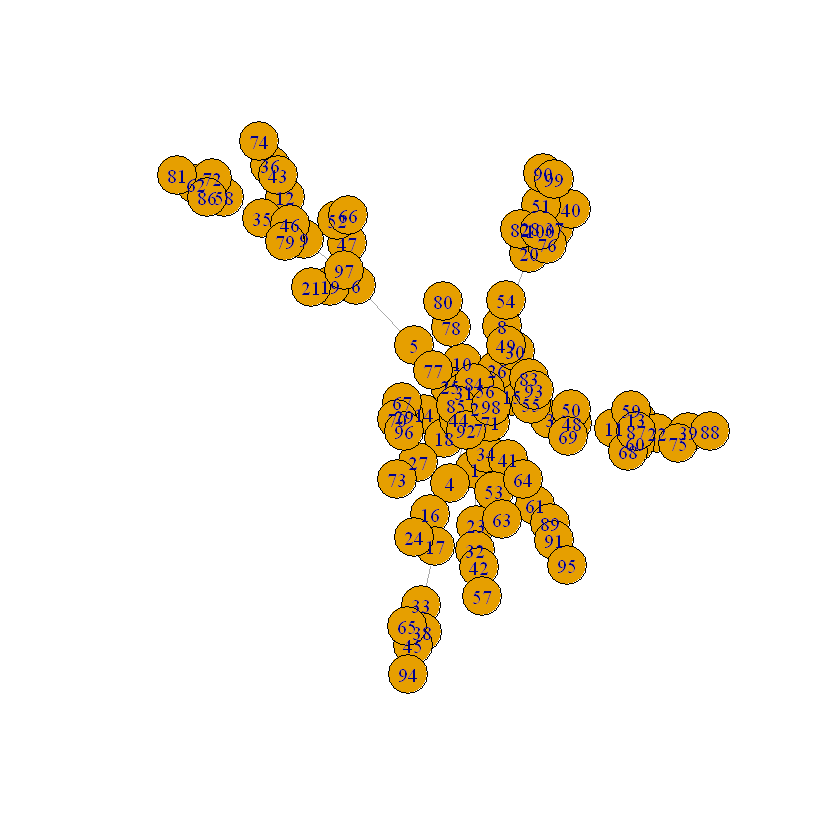

In [47]:
graph_size = 100
m = 1
g = sample_pa(graph_size, m=m, directed=FALSE)
print('degree:')
print(degree(g))
print('degree distribution:')
print(degree_distribution(g))
print('diameter:')
print(diameter(g))
print('is connected:')
print(is_connected(g))
plot(g)

  [1] 1.00 1.26 1.54 1.64 1.82 1.78 2.04 2.04 2.26 2.38 2.48 2.48 2.56 2.58 2.66
 [16] 2.88 2.78 2.92 2.80 2.94 3.00 3.04 3.06 3.14 3.30 3.18 3.46 3.42 3.28 3.18
 [31] 3.28 3.40 3.38 3.46 3.50 3.48 3.48 3.58 3.48 3.68 3.60 3.74 3.62 3.84 3.64
 [46] 3.94 3.68 3.72 3.66 3.66 3.88 3.84 3.90 3.98 3.96 3.86 3.72 3.72 3.74 3.74
 [61] 3.78 3.72 3.74 3.66 3.72 3.80 3.86 3.72 3.96 3.76 3.96 3.88 3.88 3.80 4.02
 [76] 3.92 3.94 4.04 3.90 4.18 4.02 4.02 4.00 4.00 4.02 4.00 4.04 4.10 4.08 4.24
 [91] 4.24 4.28 4.34 4.18 4.16 4.14 4.04 4.22 4.12 4.18
  [1] 0.0000 0.9324 0.7884 1.4704 1.2876 1.5916 1.4784 2.0784 1.5724 2.4556
 [11] 1.9696 2.8096 2.6064 2.9036 2.4844 2.6656 2.3116 2.7536 2.6800 2.5164
 [21] 2.8000 3.3984 3.3964 3.1404 2.9900 3.2076 2.7084 2.7436 2.8816 3.1276
 [31] 3.1216 3.4800 3.0956 2.9484 3.0700 3.2496 3.0496 3.3036 2.9696 3.4976
 [41] 2.8400 3.2524 3.4156 3.5744 3.1104 3.2364 3.0576 3.5216 3.3644 3.9244
 [51] 3.7056 4.2944 4.1100 3.9596 3.7184 3.7004 3.5616 4.0816 3.3324 3.5724
 [

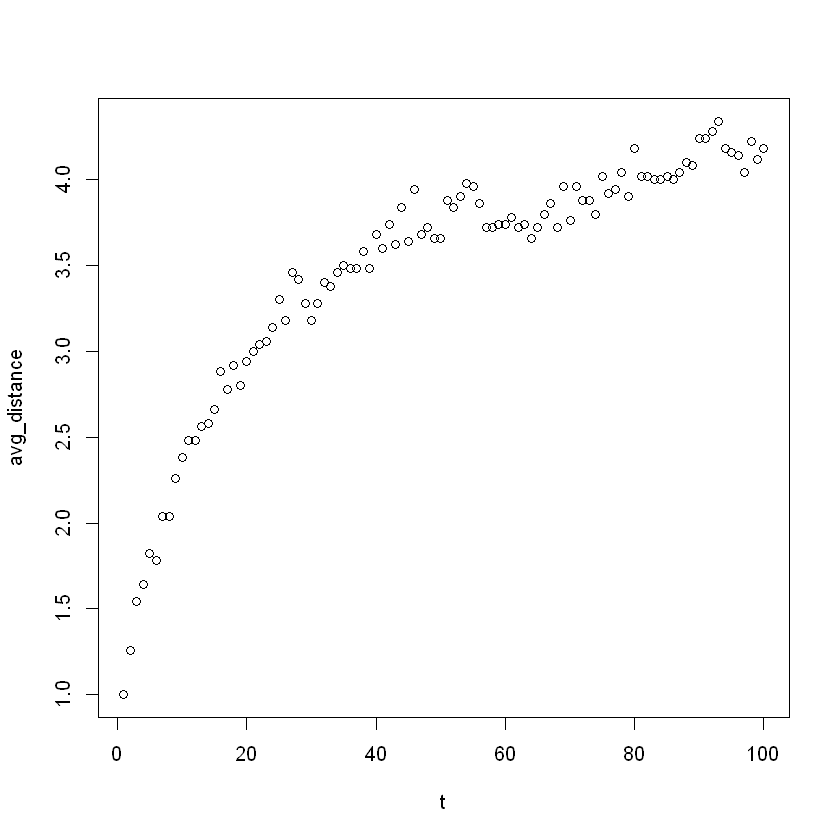

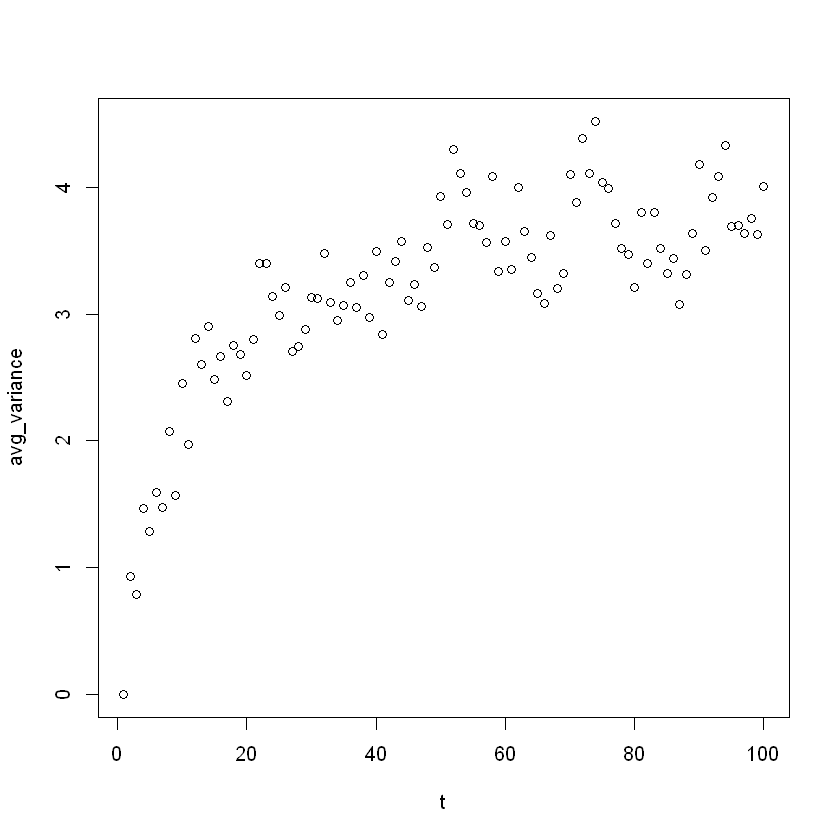

In [48]:
num_steps = 100
t = 1:num_steps

avg_dist_count_vec = integer(num_steps)
avg_var_count_vec = double(num_steps)

iter = 100

dist_vec_lst <- vector("list", iter)
last_v_lst = integer(iter)

for(i in 1:iter){
    rnd_start_node = sample(1:graph_size,1)
    dist_vec_lst[[i]] <- random_walk_distance(g, num_steps, rnd_start_node)
#     dist_vec_lst[[i]] = ret_lst[1]
#     last_v_lst[i] = ret_lst[2]
    avg_dist_count_vec = avg_dist_count_vec + dist_vec_lst[[i]]
}

#calculate average distance
avg_distance = avg_dist_count_vec / iter
print(avg_distance)
plot(t,avg_distance)

for(i in 1:iter){
    avg_var_count_vec = avg_var_count_vec + (dist_vec_lst[[i]] - avg_distance)^2
}

#calculate average variance
avg_variance = avg_var_count_vec / iter
print(avg_variance)
plot(t,avg_variance)

In [46]:
#get degree distribution at end of random walk
num_steps = 20
t = 1:num_steps

iter = 100

final_v_vec = integer(iter)

for(i in 1:iter){
    rnd_start_node = sample(1:graph_size,1)
    final_v_vec[i] = random_walk(g, num_steps, rnd_start_node)
}

# print(final_v_vec)
print("degree distribution of final nodes in walk:")
print(degree_distribution(g,v=final_v_vec))

[1] "degree distribution of final nodes in walk:"
 [1] 0.00 0.28 0.18 0.11 0.11 0.11 0.05 0.02 0.03 0.01 0.00 0.01 0.00 0.00 0.01
[16] 0.00 0.00 0.02 0.01 0.00 0.00 0.00 0.00 0.03 0.00 0.00 0.00 0.00 0.00 0.00
[31] 0.00 0.00 0.00 0.00 0.00 0.02
